In [12]:
import sys
import os

sys.path.insert(0, os.path.join("..", ".."))
import random
import time

import sklearn
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import pandas as pd

import Data
from signature_mahalanobis_knn import SignatureMahalanobisKNN
from signature_mahalanobis_knn.utils import compute_auc_given_dists
import UCR_data_support

In [13]:
DATA_DIR = '/Users/zoos/PycharmProjects/Anomaly_detection/data/'
# importlib.reload(Data)
# importlib.reload(SigMahaKNN)

### Pen digit data example; Reproduce the result.

In [21]:
data = Data.Data(n_samples=(800, 30, 30), if_sample=True)
data.load_pen_digit()

depths = [4]
digits = range(1)

doing digit 0 doing signature level  4
fit_time:  3.6063642501831055
compute_auc_time:  0.830460786819458
there is the change
depth:  4 , Auc of  digit:  0  is  0.8
there is the change


/Users/zoos/PycharmProjects/Anomaly_detection/signature_mahalanobis_knn/src/signature_mahalanobis_knn/utils.py:84: RuntimeWarning: All-NaN slice encountered
  max_val = max(np.nanmax(distances_in), np.nanmax(distances_out))
/Users/zoos/PycharmProjects/Anomaly_detection/signature_mahalanobis_knn/src/signature_mahalanobis_knn/utils.py:84: RuntimeWarning: All-NaN slice encountered
  max_val = max(np.nanmax(distances_in), np.nanmax(distances_out))


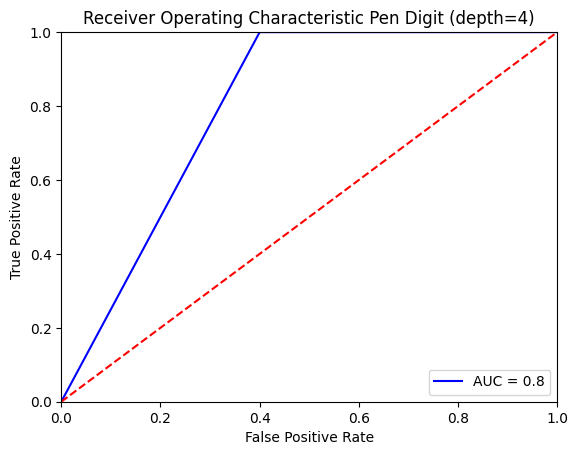

Overall,  depth:  4 AUC:  0.8
CPU times: user 13.2 s, sys: 4.04 s, total: 17.2 s
Wall time: 4.64 s


In [22]:
%%time
depth_to_auc = {}
n_neighbours = 50
for depth in depths:
    digit_to_inlier_dists = {}
    digit_to_outlier_dists = {}

    for digit in digits:
        data.load_pen_digit(digit=digit)
        print("doing digit", digit, "doing signature level ", depth)
        signature_maha_knn = signature_mahalanobis_knn.SignatureMahalanobisKNN()
        # Measure the time spent on fit
        start_time = time.time()
        signature_maha_knn.fit(
            knn_library="sklearn",
            X_train=data.corpus,
            signature_kwargs={
                "depth": depth,
            },
        )
        fit_time = time.time() - start_time
        print("fit_time: ", fit_time)

        # Measure the time spent on conformance
        start_time = time.time()
        inlier_dists = signature_maha_knn.conformance(
            data.test_inlier, n_neighbors=n_neighbours
        )
        outlier_dists = signature_maha_knn.conformance(
            data.test_outlier, n_neighbors=n_neighbours
        )
        compute_auc_time = time.time() - start_time
        print("compute_auc_time: ", compute_auc_time)

        digit_to_inlier_dists[digit] = inlier_dists
        digit_to_outlier_dists[digit] = outlier_dists

        auc = compute_auc_given_dists(inlier_dists, outlier_dists)
        print("depth: ", depth, ", Auc of", " digit: ", digit, " is ", auc)

    all_inlier_dists = np.concatenate(list(digit_to_inlier_dists.values()))
    all_outlier_dists = np.concatenate(list(digit_to_outlier_dists.values()))
    auc = compute_auc_given_dists(
        all_inlier_dists,
        all_outlier_dists,
        plot=True,
        title=f"Pen Digit (depth={depth})",
    )
    print("Overall, ", "depth: ", depth, "AUC: ", auc)
    depth_to_auc[depth] = auc

In [25]:
inlier_dists

array([3.17808345, 2.90903013, 2.64864169,        nan,        nan,
       2.94073725, 2.09585869,        nan, 2.76321417, 3.25512904,
              nan, 4.00545501, 3.96774404,        nan, 3.70931255,
              nan,        nan,        nan, 4.15736527,        nan,
       4.07228945,        nan, 2.41246371, 2.0039075 , 1.94522639,
       1.73669995, 3.33430435,        nan,        nan, 5.30823054])

#### Should be 
[13]:	
array([[0.00048547],
       [0.00069512],
       [0.00026231],
       [0.00024205],
       [0.01478617],
       [0.00101271],
       [0.00063996],
       [0.01085489],
       [0.00031296],
       [0.0003389 ],
       [0.0009286 ],
       [0.0001704 ],
       [0.00065423],
       [0.0053868 ],
       [0.00033216],
       [0.00559567],
       [0.00057974],
       [0.03442473],
       [0.00139299],
       [0.01456522],
       [0.00034281],
       [0.00019561],
       [0.00018355],
       [0.00015556],
       [0.0005628 ],
       [0.00013005],
       [0.00049769],
       [0.00200352],
       [0.00387577],
       [0.00061396]])

In [26]:
outlier_dists

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

#### Should be
array([[0.51469102],
       [0.05943012],
       [0.01498096],
       [0.06730538],
       [0.06133516],
       [0.01573002],
       [0.04566752],
       [0.04301818],
       [0.5029002 ],
       [0.56088974],
       [0.05448295],
       [0.39831413],
       [0.03359998],
       [0.08014344],
       [0.05892539],
       [0.07691271],
       [0.67933435],
       [0.20881273],
       [0.42321369],
       [0.07168717],
       [0.05208077],
       [0.51004513],
       [0.29315337],
       [0.21727576],
       [0.00884847],
       [0.02950856],
       [0.04087942],
       [0.33563053],
       [0.26939553],
       [0.07901108]])

### Ship movement data example

In [ ]:
data = Data.Data(
    n_samples=(800, 30, 30),
    if_sample=True,
)

In [ ]:
%%time
lead_lag_and_inv_rest_and_thres_distance_to_auc = {}
for lead_lag in [True, False]:
    augmentation_list1 = []
    lead_lag_and_inv_rest_and_thres_distance_to_auc[lead_lag] = {}
    if lead_lag:
        augmentation_list1.append("leadlag")
    for inv_reset in [True, False]:
        lead_lag_and_inv_rest_and_thres_distance_to_auc[lead_lag][inv_reset] = {}
        if inv_reset:
            augmentation_list = augmentation_list1 + ["ir"]
        else:
            augmentation_list = augmentation_list1

        if (not inv_reset) and (not lead_lag):
            augmentation_list = None

        for thres_distance in [4000, 8000, 16000, 32000]:
            signature_maha_knn = SignatureMahalanobisKNN()
            data.load_ship_movements(
                thres_distance=thres_distance,
            )
            # Measure the time spent on fit
            start_time = time.time()
            signature_maha_knn.fit(
                knn_library="sklearn",
                X=data.corpus,
                signature_kwargs={
                    "augmentation_list": augmentation_list,
                    "depth": 3,
                },
            )
            fit_time = time.time() - start_time
            print("fit_time: ", fit_time)

            # Measure the time spent on compute_auc
            start_time = time.time()
            auc = signature_maha_knn.compute_auc(data.test_inlier, data.test_outlier)
            compute_auc_time = time.time() - start_time
            print("compute_auc_time: ", compute_auc_time)

            print(
                "lead_lag: ",
                lead_lag,
                "inv_rest: ",
                inv_reset,
                "thres_distance: ",
                thres_distance,
                "auc: ",
                auc,
            )
            lead_lag_and_inv_rest_and_thres_distance_to_auc[lead_lag][inv_reset][
                thres_distance
            ] = auc

### UCR data example

In [ ]:
%%time
data = Data.Data(if_sample=True, n_samples=[100, 10, 10])
data_full_names = [
    "Adiac",
    "ArrowHead",
    "Beef",
    "BeetleFly",
    "BirdChicken",
    "CBF",
    "ChlorineConcentration",
    "Coffee",
    "ECG200",
    "ECGFiveDays",
    "FaceFour",
    "GunPoint",
    "Ham",
    "Herring",
    "Lightning2",
    "Lightning7",
    "Meat",
    "MedicalImages",
    "MoteStrain",
    "Plane",
    "Strawberry",
    "Symbols",
    "ToeSegmentation1",
    "ToeSegmentation2",
    "Trace",
    "TwoLeadECG",
    "Wafer",
    "Wine",
]

signature_maha_knn = SignatureMahalanobisKNN(
    augmentation_list=("addtime",),
    depth=5,
)
anomaly_level = 0.001
iter = 10
data_names = data_full_names

roughpathsbest, roughpathserror = UCR_data_support.compute_best_and_std(
    data_names, iter, data, signature_maha_knn, anomaly_level
)

anomaly_level = 0.05
roughpathsbest, roughpathserror = UCR_data_support.compute_best_and_std(
    data_names, iter, data, signature_maha_knn, anomaly_level
)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
comparison_table_1 = UCR_data_support.plot_ucr_result(
    roughpathsbest, roughpathserror, anomaly_level=0.001, ax_num=0, axs=axs
)
comparison_table_2 = UCR_data_support.plot_ucr_result(
    roughpathsbest, roughpathserror, anomaly_level=0.05, ax_num=1, axs=axs
)
fig.savefig("benchmark.pdf")
plt.show()

In [ ]:
comparison_table_1

In [ ]:
comparison_table_2

### Language dataset example

In [ ]:
data.load_language_data()

In [ ]:
random.seed(1)
data.corpus = random.sample(list(data.corpus), 800)
data.test_inlier = random.sample(list(data.test_inlier), 10)
data.test_outlier = random.sample(list(data.test_outlier), 10)

##### Takes a while as signature dimension very large

In [ ]:
%%time
signature_maha_knn = SignatureMahalanobisKNN()
signature_maha_knn.fit(data.corpus)
signature_maha_knn.compute_auc(data.test_inlier, data.test_outlier)